In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

# 8. Import dataset

In [5]:
data = 'C:/Users/dandu/Desktop/ML notebooks/DecisionTree/carevaluation/car.data'
df = pd.read_csv(data, header=None)

In [6]:
# Preview the dataset
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# 9. Exploratory data analysis

lets explore the data and gain the insights about data

In [7]:
# view dimensions of dataset

df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

In [7]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Rename column names
As seen above, the dataset does not have proper column names. The columns are labelled as 0,1,2.... and so on. Let's give proper names to the columns.

In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [9]:
# lets take a look at the dataset with updated column names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


###  View summary of dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#  Frequency distribution of values in variable.

### Lets check the frequency counts of categorical variables.

In [10]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts())   

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


### Summary of variables


- There are 7 variables in the dataset and all of them being categorical data type.

- These 7 variables are `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.

- `class` is the target variable.


### Explore `class` variable

In [12]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [13]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset and the frequency distribution of values that were checked previously also confirms the same.

## 10. Declare feature vector and target variable

In [11]:
X = df.drop(['class'], axis=1)

y = df['class']

## 11. Split data into separate training and test set

In [12]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

## 12. Feature Engineering


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [13]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables

In [14]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We can see that all  the variables are ordinal categorical data type.

In [20]:
!pip install category_encoders


  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 657.0 kB/s eta 0:00:00


In [15]:
# import category encoders

import category_encoders as ce

In [16]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [24]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [ ]:
# Now the train and test datasets are ready for model building

## 13. Decision Tree Classifier with criterion gini index

In [18]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [19]:
from sklearn.metrics import accuracy_score

In [26]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index

In [27]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [28]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [29]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [30]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


### Check for overfitting and underfitting

In [31]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021 and these two scores are quite comparable. So, there is no sign of overfitting. 


### Analysing and Evaluating the Performance of Model on Train and Test Dataset

Lets analyse the accuracy scores on train and test datasets on varying depths of the decision tree

In [25]:
train_score = []
test_score = []
for i in range(1,21):
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=0)
    clf_gini.fit(X_train, y_train)
    y_pred_train = clf_gini.predict(X_train)
    train_score_hat = accuracy_score(y_train, y_pred_train)
    train_score.append(train_score_hat)
    y_pred_test = clf_gini.predict(X_test)
    test_score_hat = accuracy_score(y_test, y_pred_test)
    test_score.append(test_score_hat)
    print('Fit/Tree Depth:%d, train: %.3f, test: %.3f' % (i, train_score_hat, test_score_hat))

Fit/Tree Depth:1, train: 0.703, test: 0.695
Fit/Tree Depth:2, train: 0.767, test: 0.800
Fit/Tree Depth:3, train: 0.787, test: 0.802
Fit/Tree Depth:4, train: 0.854, test: 0.844
Fit/Tree Depth:5, train: 0.869, test: 0.877
Fit/Tree Depth:6, train: 0.918, test: 0.897
Fit/Tree Depth:7, train: 0.940, test: 0.933
Fit/Tree Depth:8, train: 0.959, test: 0.930
Fit/Tree Depth:9, train: 0.978, test: 0.944
Fit/Tree Depth:10, train: 0.986, test: 0.944
Fit/Tree Depth:11, train: 0.995, test: 0.960
Fit/Tree Depth:12, train: 1.000, test: 0.942
Fit/Tree Depth:13, train: 1.000, test: 0.942
Fit/Tree Depth:14, train: 1.000, test: 0.942
Fit/Tree Depth:15, train: 1.000, test: 0.942
Fit/Tree Depth:16, train: 1.000, test: 0.942
Fit/Tree Depth:17, train: 1.000, test: 0.942
Fit/Tree Depth:18, train: 1.000, test: 0.942
Fit/Tree Depth:19, train: 1.000, test: 0.942
Fit/Tree Depth:20, train: 1.000, test: 0.942


Now I tried to visualize the accuracy scores on train and test datasets obtained with different depths of decision tree

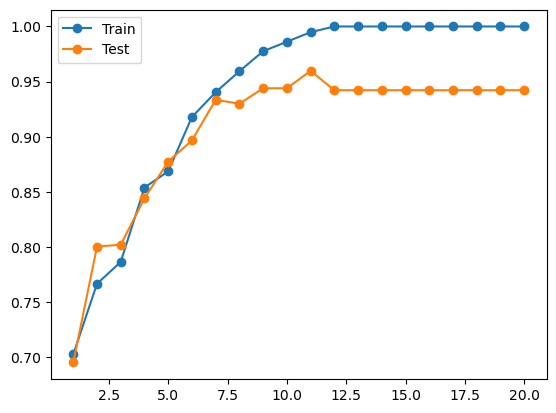

In [27]:
values = [i for i in range(1,21)]
# plot of train and test scores vs tree depth
plt.plot(values, train_score, '-o', label='Train')
plt.plot(values, test_score, '-o', label='Test')
plt.legend()
plt.show()

The above line graph shows that the accuracy score of test dataset has reached its highest value when depth is 11 and then it has a slight downfall and been a constant there after.

## 14. Decision Tree Classifier with criterion entropy

In [32]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [33]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [34]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8021


### Compare the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [35]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [36]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7865


### Check for overfitting and underfitting

In [37]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021
